### VAE with NN-FullyConnected 2D and MNIST

In [2]:
import tensorflow as tf
import time
import numpy as np
print(tf.__version__)

# %matplotlib inline
# %load_ext autoreload
# %autoreload 2
# %matplotlib notebook

1.4.0


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True, reshape=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis


def mnist_grid(X):
    X = X.reshape([-1,28,28])
    num_images = X.shape[0]
    fig = figure()
    fig.set_size_inches(10,10)
    
    for i in range(num_images):
        a = fig.add_subplot(1, num_images, i+1)
        image = X[i,:]
        imshow(image, cmap='gray')
        axis('off')
    
    plt.show()

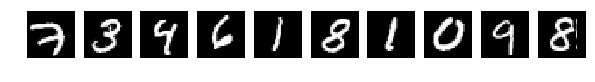

(3000, 784)
(750, 784)


numpy.ndarray

In [5]:
X_train = mnist.train.images[:3000]
X_valid= mnist.validation.images[:750]
mnist_grid(X_train[:10])
print(X_train.shape)
print(X_valid.shape)
type(X_train)

In [ ]:
tf.reset_default_graph()

n_inputs = X_train.shape[1]
n_hidden1 = 256
n_hidden2 = 256
n_hidden3 = 32
n_hidden4 = n_hidden2
n_hidden5 = n_hidden1
n_outputs = n_inputs

x = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden1 = tf.layers.dense(x, n_hidden1, activation=tf.nn.elu)
hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.elu)
hidden3_mean = tf.layers.dense(hidden2, n_hidden3, activation=None)
hidden3_sigma = tf.layers.dense(hidden2, n_hidden3, activation=None)
noise = tf.random_normal(tf.shape(hidden3_sigma), dtype=tf.float32)
hidden3 = hidden3_mean + hidden3_sigma * noise
hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.elu)
hidden5 = tf.layers.dense(hidden4, n_hidden5, activation=tf.nn.elu)
logits = tf.layers.dense(hidden5, n_outputs, activation=None)
outputs = tf.sigmoid(logits)


#
# Funcion de perdida (MSE) y entrenamiento
#
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=x, logits=logits)
xentropy_loss = tf.reduce_sum(xentropy)
eps = 1e-10
latent_loss = 0.5 * tf.reduce_sum(
    # centre en 0 y los demas los centre a 1
    tf.square(hidden3_sigma) + tf.square(hidden3_mean) - 1 - tf.log(eps + tf.square(hidden3_sigma))
) 

loss = xentropy_loss + latent_loss

mse_loss = tf.reduce_mean(tf.reduce_sum(tf.square(x - outputs), axis=1))

optimizer = tf.train.AdamOptimizer()
training_op = optimizer.minimize(loss)
saver = tf.train.Saver()

In [ ]:
tf.reset_default_graph()

n_inputs = X_train.shape[1]
n_hidden1 = 256
n_hidden2 = 256
n_hidden3 = 32
n_hidden4 = n_hidden2
n_hidden5 = n_hidden1
n_outputs = n_inputs

x = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden1 = tf.layers.dense(x, n_hidden1, activation=tf.nn.elu)
hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.elu)
hidden3_mean = tf.layers.dense(hidden2, n_hidden3, activation=None)
hidden3_sigma = tf.layers.dense(hidden2, n_hidden3, activation=None)
noise = tf.random_normal(tf.shape(hidden3_sigma), dtype=tf.float32)
hidden3 = hidden3_mean + hidden3_sigma * noise
hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.elu)
hidden5 = tf.layers.dense(hidden4, n_hidden5, activation=tf.nn.elu)
logits = tf.layers.dense(hidden5, n_outputs, activation=None)
outputs = tf.sigmoid(logits)

# MSE loss
def lossFunction(X):
    mse_loss = tf.reduce_mean(tf.reduce_sum(tf.square(X - outputs), axis=1))
    return mse_loss

#
# Funcion de perdida (MSE) y entrenamiento
#
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=x, logits=logits)
xentropy_loss = tf.reduce_sum(xentropy)
eps = 1e-10
latent_loss = 0.5 * tf.reduce_sum(
    # centre en 0 y los demas los centre a 1
    tf.square(hidden3_sigma) + tf.square(hidden3_mean) - 1 - tf.log(eps + tf.square(hidden3_sigma))
) 

loss = xentropy_loss + latent_loss

optimizer = tf.train.AdamOptimizer()
training_op = optimizer.minimize(loss)

loss_training = lossFunction(X_train) 
loss_validation = lossFunction(X_valid)

saver = tf.train.Saver()

In [ ]:
n_iterations = 10001

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for iteration in range(n_iterations):
        _, mse = sess.run([training_op, mse_loss], feed_dict={x: X})
        
        if iteration % 100 == 0:
            print('Iteración: {:04d}, MSE: {:.9f}'.format(iteration, mse))
            R = sess.run(outputs, feed_dict={x:X[:10]})
            mnist_grid(R)
    saver.save(sess, "./VAE.ckpt")

In [ ]:
n_iterations = 10001

points = []
points_train = []
points_valid = []

fig = plt.figure()
ax = fig.add_subplot(111)

plt.ion()

fig.show()
fig.canvas.draw()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for iteration in range(n_iterations):
        
        _, mse_train = sess.run([training_op, loss_training], feed_dict={x: X_train})
        mse_valid = sess.run([loss_validation],feed_dict={x:X_valid})
                
#         points_train.append(mse_train)
#         points_valid.append(mse_valid)
        
#         points = np.arange(iteration + 1)
        
#         ax.clear()
        
#         ax.plot(points, points_train, color='blue')
#         ax.plot(points, points_valid, color='red')
#         fig.canvas.draw()
        #time.sleep(1.0)
        #plt.show()
        
        if iteration % 100 == 0:
            print('Iteracion: {:04d}'.format(iteration))
            print('MSE_train: {:.9f}'.format(mse_train))
            print('MSE_valid: {:.9f}'.format(mse_valid[0]))
            #print(mse_valid)
            
    #saver.save(sess, "./VAE.ckpt")
    
    #R = sess.run(outputs, feed_dict={x:X_valid[:10]})
    #mnist_grid(R)

In [ ]:
n_digits = 10
random_codings = np.random.normal(size=[n_digits, n_hidden3])

with tf.Session() as sess:
  saver.restore(sess, "./VAE.ckpt")
  generated_images = sess.run(outputs, feed_dict={hidden3: random_codings})

mnist_grid(generated_images)
mnist_grid(X_train[random_codings])


In [ ]:
points_valid[-10:]

points = np.arange(len(points_train))
plt.title('Reconstruction MNIST images 2D - VAE Dense Layers')
plt.ylabel('MSE - Loss')
plt.xlabel('Iterations')
plt.plot(points, points_train, label='train')
plt.plot(points, points_valid, label='test')
plt.legend()

plt.show()

## VAE with CNN 2D and MNIST 

https://github.com/keras-team/keras/blob/master/examples/variational_autoencoder_deconv.py